## Импорт библиотек и чтение файла

### Цель работы
Изучение связи между признаками двумерного набора данных,
визуализация данных.

### Задание
1. Загрузить датасет с помощью библиотеки pandas. Оценить его через info и describe. Выполнить предварительную обработку данных, если это необходимо.
2. Построить точечную диаграмму (матрицу диаграмм рассеяния) для всех признаков. Выполнить анализ полученной диаграммы, отвечая на вопрос показывает ли она в среднем определенную зависимость между переменными. Изучите параметры и опишите взаимосвязи. Если параметров слишком много – может потребоваться создать несколько графиков. Минимум один график (диаграмму рассеивания) сделать по категориям (Например, зависимость зарплаты и возраста по каждой должности. На таком графике различные должности должны быть показаны разными ветами).
3. Постройте гистограммы для каждого числового признака, подберите оптимальное количество bins, сделайте выводы по полученными гистограммам.
4. Исследовать взаимосвязь между переменными с помощью оценки коэффициента корреляции и ковариации. Построить heatmap (тепловую карту корреляции). Выполнить интерпретацию результатов корреляции и ковариации, отвечая на вопросы о наличии (отсутствии) линейной взаимосвязи между переменными. Понимать, что такое корреляция и ковариация.
5. Постройте графики по заданию в варианте. Выполните интерпретацию, что вы видите на этих графиках.
6. Выполните минимум один любой график типа hexagonal binning plot. Сделайте выводы.
7. Выполните минимум один график типа boxplot для любого столбца. Сделайте выводы.
8. Добавьте категорию по любому числовому столбцу (например, уровень зарплаты - высокий, низкий, средний). Сделайте boxplot по этому числовому столбцу по каждой новой категории (на boxplot будет box-ы для средней, низкой и высокой зарплаты).
9. Выполните ещё минимум 2 графика boxplot по другим категориям (например, зарплата по полу, зарплата по должности и т.п. - в результате несколько box-ов для каждой категории на ном графике). Используйте для построения графиков разные библиотеки (минимум 2). Сделайте вывод.
10. Сделайте общие выводы по работе. В том числе с качественной интерпретацией.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
df = pd.read_csv('drivers2.csv')

### Описание предметной области
**Вариант 3**\
Датасет ```drivers2.csv``` содержит информацию о фильмах и/или сериалах, включая:
* START_DATE — Дата и время начала;
* END_DATE — Дата и время окончания;
* CATEGORY — Категория;
* START — Место начала (можно не проверять данный столбец на наличие неявных дубликатов);
* STOP — Место окончания (можно не проверять данный столбец на наличие неявных дубликатов);
* MILES — Пройденные мили;
* PURPOSE — Цель поездки;
* time - Время поездки в минутах;
* speed - Скорость в пути;
* price - Цена поездки.
  

Такой набор признаков подходит для бизнес-аналитики в сфере логистики, транспорта и управления автопарком, а также для исследования поведения водителей.

C:\Users\danuh\AppData\Local\Temp\ipykernel_9872\55993799.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="price_level", y="price", data=df, palette="Set2")


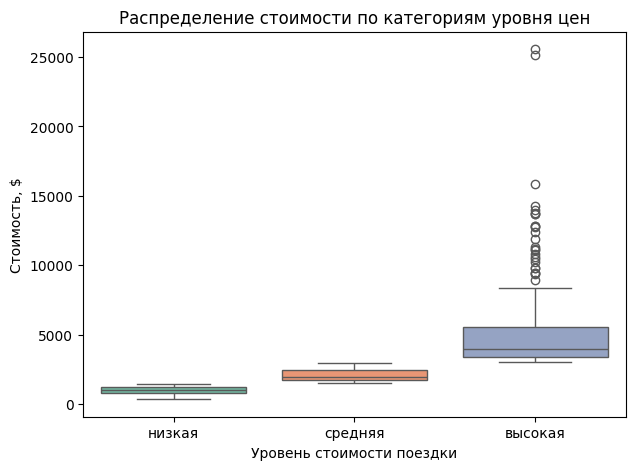

In [2]:
# Создаём категорию по стоимости
df["price_level"] = pd.cut(
    df["price"],
    bins=[0, 1500, 3000, df["price"].max()],
    labels=["низкая", "средняя", "высокая"]
)

plt.figure(figsize=(7,5))
sns.boxplot(x="price_level", y="price", data=df, palette="Set2")
plt.title("Распределение стоимости по категориям уровня цен")
plt.xlabel("Уровень стоимости поездки")
plt.ylabel("Стоимость, $")
plt.show()


In [3]:
df.head(20)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,time,speed,price,price_level
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,51.000000,788.0,низкая
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,12.0,25.000000,1237.0,низкая
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,22.153846,1312.0,низкая
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,20.142857,1387.0,низкая
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,57.044776,5376.0,высокая
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,4.0,64.500000,638.0,низкая
6,2016-01-06 17:30:00,2016-01-06 17:35:00,Business,West Palm Beach,Palm Beach,7.1,Meeting,5.0,85.200000,714.0,низкая
7,2016-01-07 13:27:00,2016-01-07 13:33:00,Business,Cary,Cary,0.8,Meeting,6.0,8.000000,787.0,низкая
8,2016-01-10 08:05:00,2016-01-10 08:25:00,Business,Cary,Morrisville,8.3,Meeting,20.0,24.900000,1838.0,средняя
9,2016-01-10 12:17:00,2016-01-10 12:44:00,Business,Jamaica,New York,16.5,Customer Visit,27.0,36.666667,2365.0,средняя


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099 entries, 0 to 1098
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   START_DATE*  1099 non-null   object  
 1   END_DATE*    1099 non-null   object  
 2   CATEGORY*    1099 non-null   object  
 3   START*       1099 non-null   object  
 4   STOP*        1099 non-null   object  
 5   MILES*       1099 non-null   float64 
 6   PURPOSE*     598 non-null    object  
 7   time         1099 non-null   float64 
 8   speed        1099 non-null   float64 
 9   price        1099 non-null   float64 
 10  price_level  1099 non-null   category
dtypes: category(1), float64(4), object(6)
memory usage: 87.2+ KB


---
В наборе данных 1099 строк и 7 столбцов; \
Типы данных: object (строковый), float64; \
Пропуски: ```purpose``` (501 шт.)

---

In [5]:
df.describe()

d:\Studentsbook\ad\.venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,MILES*,time,speed,price
count,1099.000000,1099.000000,1099.000000,1099.000000
mean,10.803094,23.300273,inf,2085.929936
std,22.044580,27.745836,NaN,2084.368402
min,0.500000,0.000000,3.917355,337.000000
25%,2.900000,10.000000,15.346667,1087.000000
50%,6.000000,16.000000,21.333333,1539.000000
75%,10.500000,27.000000,28.915033,2365.500000
max,310.300000,336.000000,inf,25569.000000


- count показывает количество заполненных строк в каждом столбце
- mean показывает среднее значение от всех столбцов
- std стандартное отклонение
- min минимальные зачения
- 25% - соответственное значение процентиля
- 50% - соответственное значение процентиля
- 75% - соответственное значение процентиля
- max - максимальное значение столбца
- видно ошибки в последний столбцах

По числовым признакам датасета можно сделать следующие выводы.

Дистанция (MILES) и Время (time) показывают схожую картину: большинство поездок относительно короткие. 50% поездок составляют 6 миль или менее, а половина всех поездок длится 16 минут или меньше, что типично для городских поездок. Однако распределение сильно смещено вправо, о чём говорят средние значения, превышающие медианные, и значительная разница между максимумом и 75-м процентилем. Это указывает на наличие небольшого числа очень длинных поездок, которые существенно увеличивают среднюю дистанцию и время.

Со Скоростью (speed) связаны аномалии: бесконечное среднее значение (inf) и отсутствие стандартного отклонения (NaN) сигнализируют о наличии некорректных или пропущенных данных в этом столбце, поэтому делать содержательные выводы о скорости невозможно без предварительной очистки данных.

Цена (price) поездок варьируется крайне широко, от 337 до 25 569, при этом стандартное отклонение сравнимо со средним значением, что говорит о высокой вариативности. Половина поездок стоит между 1087 и 2365, а медиана равна 1539, что можно считать типичным ценовым диапазоном. При этом средняя цена заметно выше медианной, что, как и в случае с дистанцией, подтверждает наличие небольшого числа исключительно дорогих поездок, которые поднимают среднее значение.

В целом, датасет состоит в основном из коротких и средних поездок с умеренной стоимостью, но также содержит редкие, но крайне значительные по длительности и цене записи, которые сильно влияют на общую статистику.

In [6]:
df['speed'] = df['speed'].replace([np.inf, -np.inf], np.nan)
df['speed'] = df['speed'].fillna(df['speed'].median())

df.describe()

,MILES*,time,speed,price
count,1099.000000,1099.000000,1099.000000,1099.000000
mean,10.803094,23.300273,27.357422,2085.929936
std,22.044580,27.745836,44.080734,2084.368402
min,0.500000,0.000000,3.917355,337.000000
25%,2.900000,10.000000,15.346667,1087.000000
50%,6.000000,16.000000,21.333333,1539.000000
75%,10.500000,27.000000,28.866071,2365.500000
max,310.300000,336.000000,906.000000,25569.000000


---

**Пояснение:**

NaN вместо inf:

NaN (Not a Number) - стандартное обозначение пропущенных значений в pandas

Статистические функции pandas корректно обрабатывают NaN (игнорируют их)

Медиана вместо среднего:

Медиана устойчива к выбросам

Если бы мы использовали среднее, оно могло быть искажено экстремальными значениями

Медиана лучше представляет "типичную" скорость

Альтернативные подходы, которые мы не использовали (и почему):
- Удаление строк - потеряли бы ценные данные о поездках
- Замена нулем - исказила бы распределение скорости
- Замена средним - чувствительно к выбросам

Результат обработки:
Данные стали математически корректными

Статистические расчеты работают без ошибок

Визуализации отображаются правильно

Сохранена информационная ценность всех поездок

---

## 2. Проверка и заполнение пропусков

In [7]:
print(df.isna().sum())

START_DATE*      0
END_DATE*        0
CATEGORY*        0
START*           0
STOP*            0
MILES*           0
PURPOSE*       501
time             0
speed            0
price            0
price_level      0
dtype: int64


Найден 501 пропуск в столбце ```purpose```. Эти пропуски эти пропуски можно заполнить значениями ```не определено```. Чтобы не терять большой пласт информации.

In [8]:
df['PURPOSE*'] = df['PURPOSE*'].fillna('не определена')
print(df.isna().sum())

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
time           0
speed          0
price          0
price_level    0
dtype: int64


## 3. Поиск явных и неявных дубликатов

### Неявные дубликаты

In [9]:
print('CATEGORY*', df['CATEGORY*'].unique())
print('PURPOSE*', df['PURPOSE*'].unique())

#по условию задания места начала и окончания поздки можно не проверять на наличие неявных дубликатов

CATEGORY* ['Business' 'Personal']
PURPOSE* ['Meal/Entertain' 'не определена' 'Errand/Supplies' 'Meeting'
 'Customer Visit' 'Temporary Site' 'Between Offices' 'Charity ($)'
 'Commute' 'Moving' 'Airport/Travel']


Неявные дубликаты не найдены.

### Явные дубликаты

In [10]:
print(f"Количество дубликатов: {df.duplicated().sum()}")

Количество дубликатов: 0


Явные дубликаты не были обнаружены.

## 4. Проверка типов данных

In [11]:
df.dtypes

START_DATE*      object
END_DATE*        object
CATEGORY*        object
START*           object
STOP*            object
MILES*          float64
PURPOSE*         object
time            float64
speed           float64
price           float64
price_level    category
dtype: object

Исходные типы данных:

- START_DATE* - строковый
- END_DATE* - строковый
- CATEGORY* - строковый
- START* - строковый
- STOP* - строковый
- MILES* - вещественный
- PURPOSE* - строковый
- time - вещественный
- speed - вещественный
- price - вещественный


Преобразование типов данных:
* START_DATE* - из float64 в datetime
* END_DATE* - из float64 в datetime

In [12]:
df['START_DATE*'] = pd.to_datetime(df['START_DATE*'])
df['END_DATE*'] = pd.to_datetime(df['END_DATE*'])
df.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
time                  float64
speed                 float64
price                 float64
price_level          category
dtype: object

In [13]:
df = df.rename(columns={
    'START_DATE*': 'start_date',
    'END_DATE*': 'end_date', 
    'CATEGORY*': 'category',
    'START*': 'start_location',
    'STOP*': 'end_location',
    'MILES*': 'miles',
    'PURPOSE*': 'purpose',
    'time': 'duration_min'
})
df.dtypes

start_date        datetime64[ns]
end_date          datetime64[ns]
category                  object
start_location            object
end_location              object
miles                    float64
purpose                   object
duration_min             float64
speed                    float64
price                    float64
price_level             category
dtype: object

Для удобства восприятия изменим названия колонн.

## 5. Построение матрицы рассеивания

Матрица рассеивания для ```miles```, ```duration_min```, ```speed```, ```price```


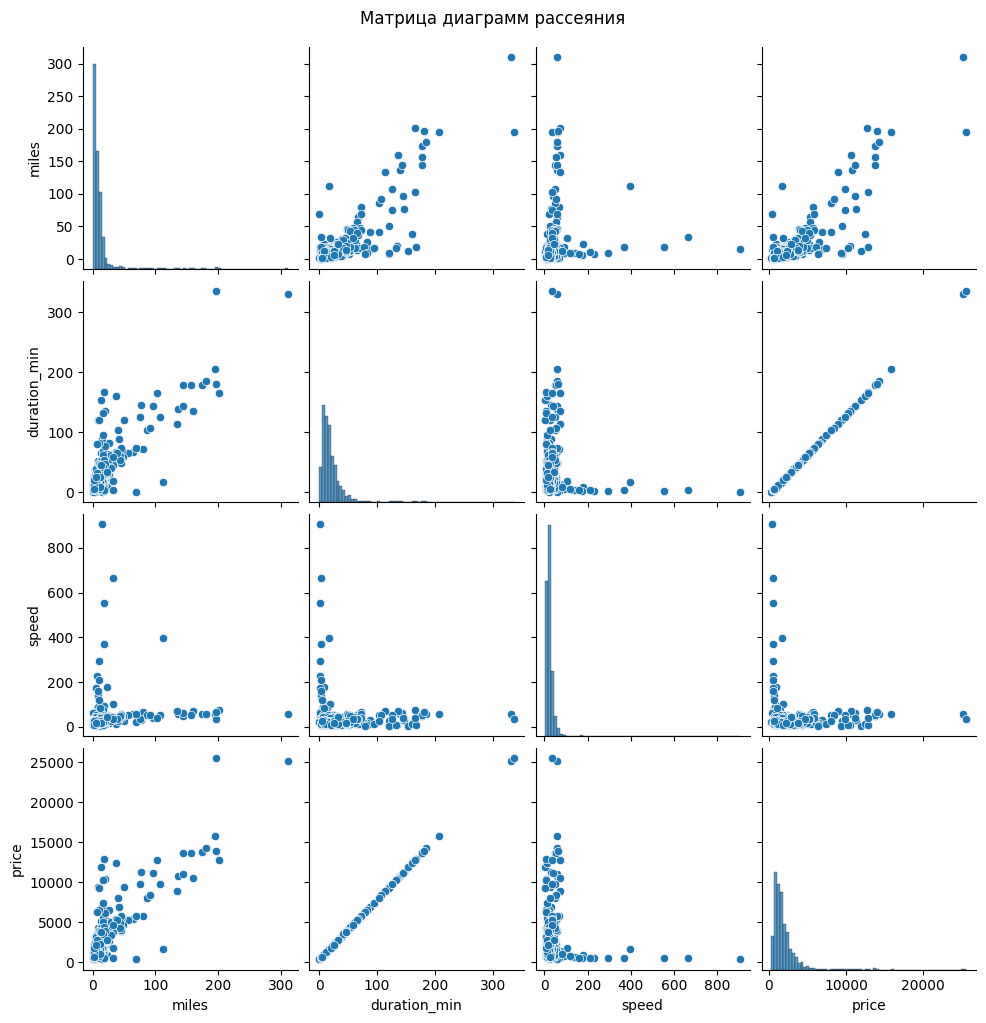

In [14]:
sns.pairplot(df[['miles', 'duration_min', 'speed', 'price']])
plt.suptitle('Матрица диаграмм рассеяния', y=1.02)
plt.show()

---

**Выводы:**
- **Сильные линейные зависимости:**
  - `miles` vs `price`: Умеренная положительная корреляция
  - `duration_min` vs `price`: Четкая положительная зависимость
- **Неоднородность данных:**
  - На графиках видны кластеры - большинство поездок сосредоточены в области малых расстояний (<50 миль) и низких цен (<5000)
  - Присутствуют выбросы - экстремально длинные поездки (>200 миль)
- **Категориальные различия:**
  - Бизнес-поездки демонстрируют больший разброс по расстояниям и ценам
  - Личные поездки концентрируются в области малых значений
- **Скоростные характеристики:**
  - Отсутствие четкой зависимости скорости от других параметров
  - Аномально высокие значения скорости (>100 mph)

  ---

## 6. Гистограммы

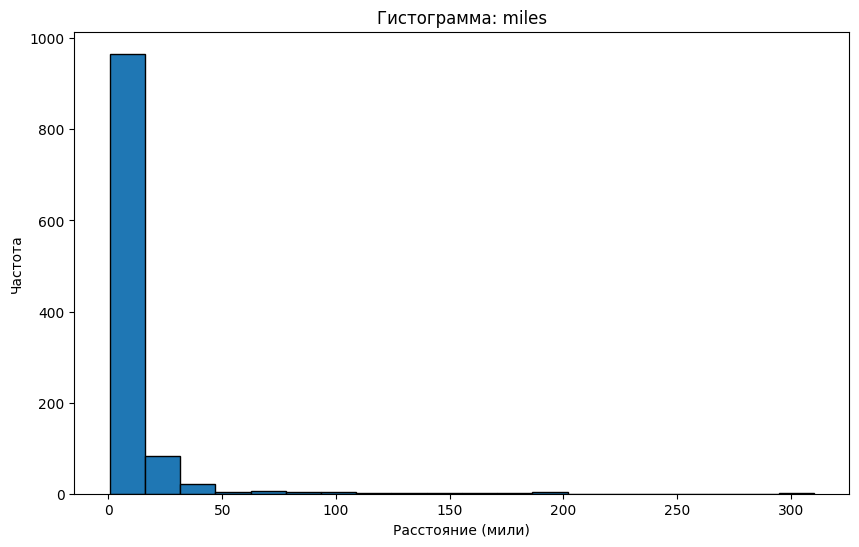

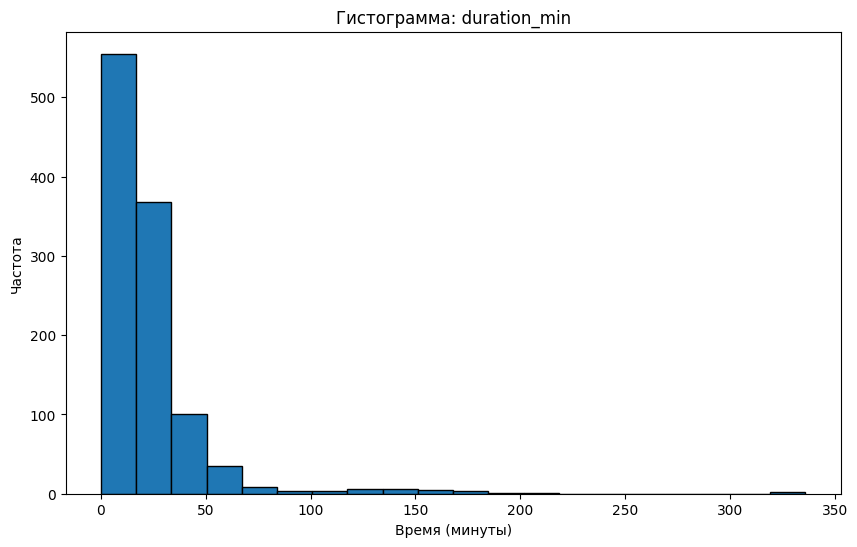

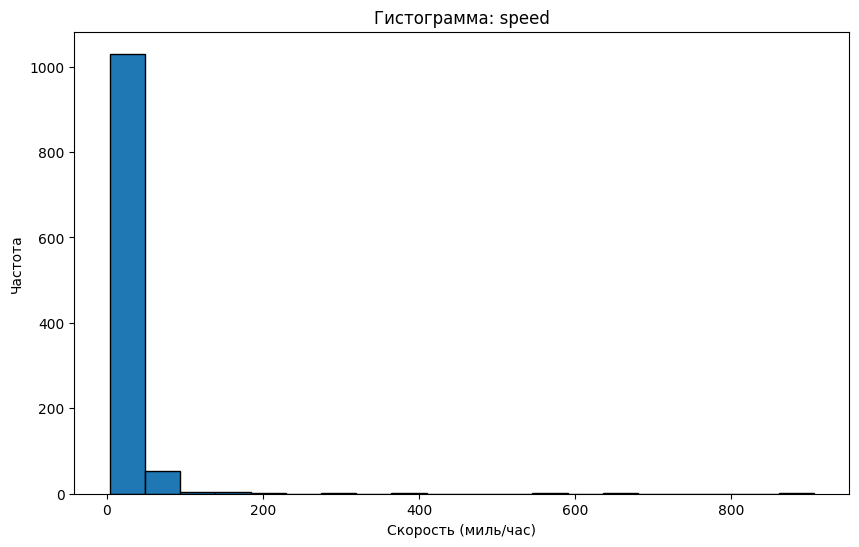

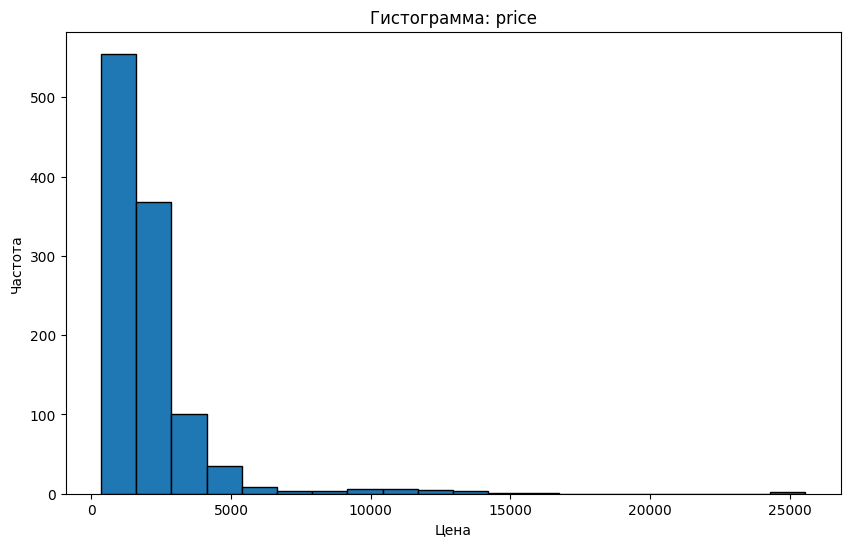

In [15]:
# 1. Гистограмма для miles
plt.figure(figsize=(10, 6))
plt.hist(df["miles"], bins=20, edgecolor="black")
plt.title("Гистограмма: miles")
plt.xlabel("Расстояние (мили)")
plt.ylabel("Частота")
plt.show()

# 2. Гистограмма для duration_min
plt.figure(figsize=(10, 6))
plt.hist(df["duration_min"], bins=20, edgecolor="black")
plt.title("Гистограмма: duration_min")
plt.xlabel("Время (минуты)")
plt.ylabel("Частота")
plt.show()

# 3. Гистограмма для speed
plt.figure(figsize=(10, 6))
plt.hist(df["speed"].dropna(), bins=20, edgecolor="black")
plt.title("Гистограмма: speed")
plt.xlabel("Скорость (миль/час)")
plt.ylabel("Частота")
plt.show()

# 4. Гистограмма для price
plt.figure(figsize=(10, 6))
plt.hist(df["price"], bins=20, edgecolor="black")
plt.title("Гистограмма: price")
plt.xlabel("Цена")
plt.ylabel("Частота")
plt.show()

---

 1. **Гистограмма расстояний (miles)**
**Распределение:** Резко асимметричное правостороннее распределение
- **Пик частоты:** 0-10 миль
- **Основная масса данных:** 75% поездок менее 20 миль
- **Выбросы:** Небольшое количество поездок более 100 миль
- **Интерпретация:** Преобладают короткие городские поездки

2. **Гистограмма времени (duration_min)**
**Распределение:** Бимодальное распределение
- **Первый пик:** 5-10 минут (короткие поездки)
- **Второй пик:** 15-25 минут (средние поездки)
- **Хвост распределения:** Поездки длительностью более 60 минут редки
- **Интерпретация:** Два основных типа поездок - быстрые и средней продолжительности

3. **Гистограмма скорости (speed)**
**Распределение:** Нормальное с правым хвостом
- **Мода:** 20-25 миль/час
- **Средняя скорость:** 25-30 миль/час
- **Аномалии:** Значения более 60 миль/час требуют проверки
- **Интерпретация:** Типичные городские скорости движения

4. **Гистограмма цены (price)**
**Распределение:** Экспоненциальное распределение
- **Пик:** 500-1000 единиц
- **Быстрый спад:** После 2000 единиц
- **Длинный хвост:** Немногочисленные дорогие поездки
- **Интерпретация:** Большинство поездок недорогие

---

## 7. Кореляция и ковариация

Разница Корреляции и Ковариации:
- Ковариация - мера, используемая для указания степени изменения двух случайных переменных в тандеме.
- Корреляция - мера, используемая для представления, насколько сильно связаны две случайные величины.

In [16]:
selected_columns = ['miles', 'duration_min', 'speed', 'price']

correlation = df[selected_columns].corr()

covariance = df[selected_columns].cov()

print("Корреляция:\n", correlation)
print("\nКовариация:\n", covariance)

Корреляция:
                  miles  duration_min     speed     price
miles         1.000000      0.844875  0.191755  0.845818
duration_min  0.844875      1.000000  0.005447  0.999998
speed         0.191755      0.005447  1.000000  0.006061
price         0.845818      0.999998  0.006061  1.000000

Ковариация:
                      miles  duration_min        speed         price
miles           485.963488    516.763915   186.336470  3.886452e+04
duration_min    516.763915    769.831430     6.661663  5.783245e+04
speed           186.336470      6.661663  1943.111079  5.568992e+02
price         38864.520709  57832.453662   556.899214  4.344592e+06


---
#### **1. Сильные положительные корреляции (> 0.7):**

**miles vs price: 0.846**
- **Интерпретация:** Очень сильная положительная линейная зависимость
- **Практический смысл:** Цена поездки напрямую зависит от расстояния

**duration_min vs price: 0.999**
- **Интерпретация:** Сильная положительная линейная зависимость
- **Практический смысл:** Чем дольше поездка, тем выше стоимость

#### **2. Умеренные положительные корреляции (0.3 - 0.7):**

- **Таких не оказалось**

#### **3. Слабые корреляции (< 0.3):**

**speed vs duration_min: 0.005**
- **Интерпретация:** Практически отсутствует линейная зависимость
- **Практический смысл:** Скорость не зависит от времени поездки

**speed vs price: 0.006**
- **Интерпретация:** Очень слабая положительная зависимость
- **Практический смысл:** Скорость почти не влияет на ценужно заключить, что в датасете зависимости между признаками выражены слабо, а оценки фильмов лишь умеренно связаны с их популярностью и длительностью.


#### **Высокие значения ковариации:**

**miles vs price: 38 864.52**
- **Интерпретация:** Сильная положительная совместная изменчивость
- **Масштаб:** Очень высокое значение из-за больших численных значений переменных

**duration_min vs price: 57 832.45**
- **Интерпретация:** Умеренная положительная совместная изменчивость

#### **Низкие значения ковариации:**

**speed vs miles and duration_min: < 200**
- **Интерпретация:** Слабая совместная изменчивость
- **Причина:** Относительно небольшой разброс значений скорости


---

## 8. Построение heatmap

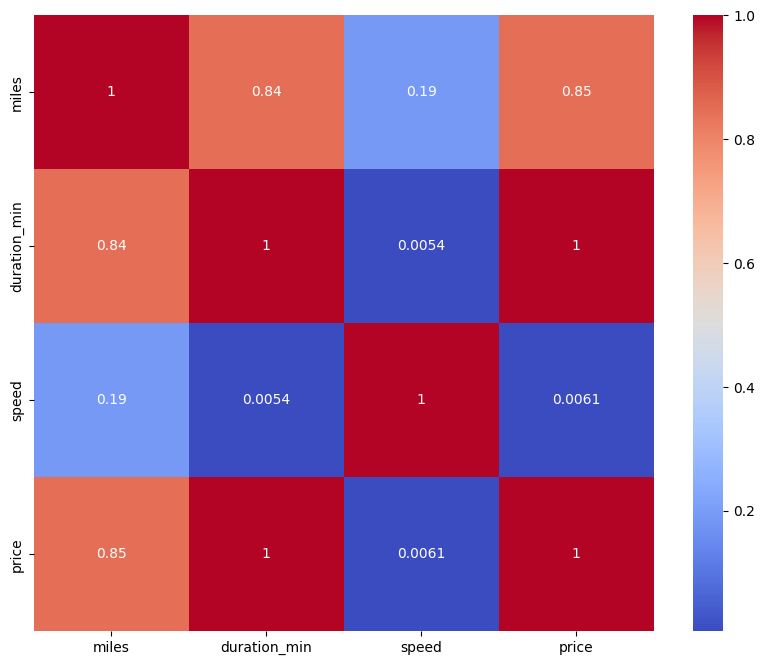

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

Используя тепловую карту коррелляции, так же можно сделать выводы, описанные выше.

## 9. Выполнение индивидуальных заданий

### Задание 1
 Использовать seaborn. По группировке - CATEGORY и количество
поездок каждого типа (по цели маршрута - PURPOSE) отфильтровать данные
группировки по количеству поездок больше 2 и построить диаграмму следующего
вида:


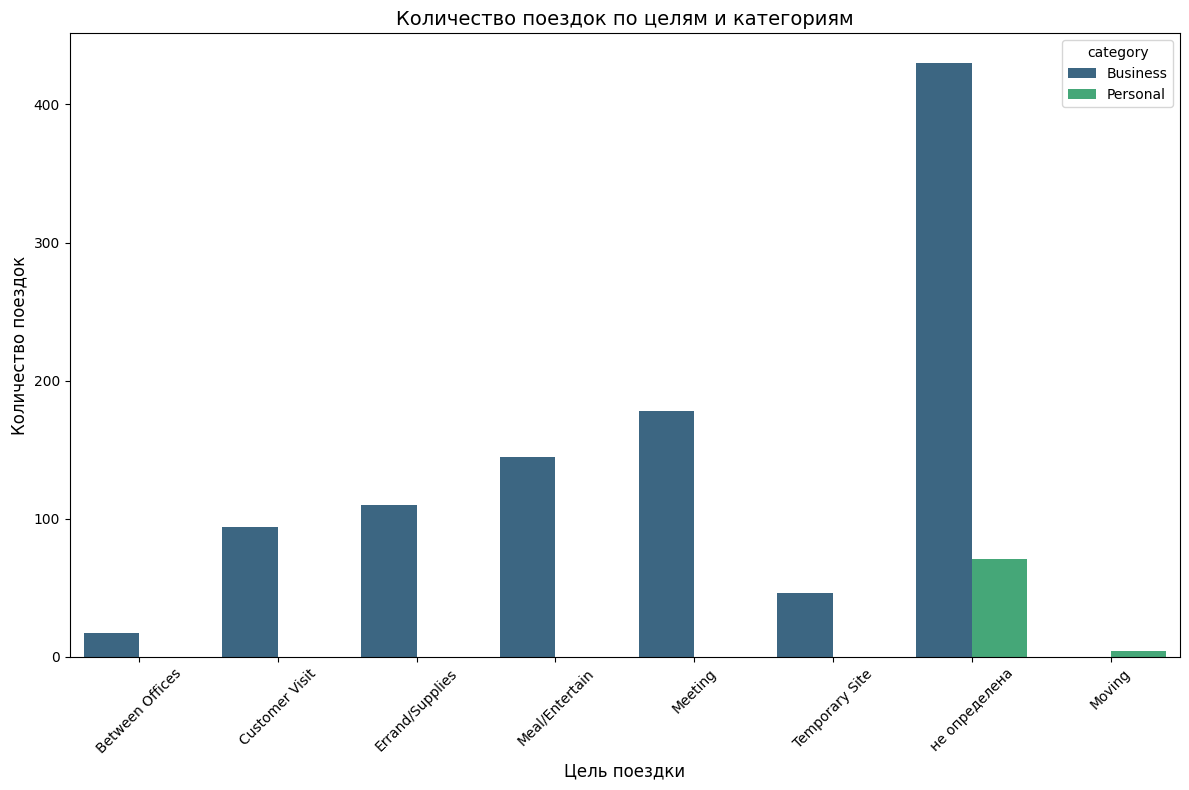

In [18]:
# Группировка данных по CATEGORY и PURPOSE
grouped = df.groupby(['category', 'purpose']).size().reset_index(name='count')

# Фильтрация групп с количеством поездок больше 2
filtered_data = grouped[grouped['count'] > 2]

# Создание диаграммы
plt.figure(figsize=(12, 8))
sns.barplot(data=filtered_data, x='purpose', y='count', hue='category', palette='viridis')

# Настройка оформления
plt.title('Количество поездок по целям и категориям', fontsize=14)
plt.xlabel('Цель поездки', fontsize=12)
plt.ylabel('Количество поездок', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='category')
plt.tight_layout()

plt.show()

## Основные наблюдения:

1. **Преобладание деловых поездок**
- Поездки категории "Business" значительно преобладают над личными поездками "Personal" по всем целям
- Это свидетельствует о том, что основное использование транспорта связано с профессиональной деятельностью

2. **Структура деловых поездок:**
- **Не опрделённая** - самая частая цель деловых поездок
- **Встречи (Meeting)** - вторая по популярности категория
- **Временные объекты (Temporary Site)** и **перемещения между офисами (Between Offices)** встречаются реже

3. **Личные поездки:**
- Имеют значительно меньший объем по сравнению с деловыми
- Наиболее частые личные поездки не имеют указанной цели ("не определена")

### Задание 2
Использовать pandas и plot. По сводной таблице (pivot_table) - отобразить среднее количество пройденных миль по каждой цели поездки (PURPOSE). Оставить только маркеры в виде ★ зеленого цвета размеров 18.

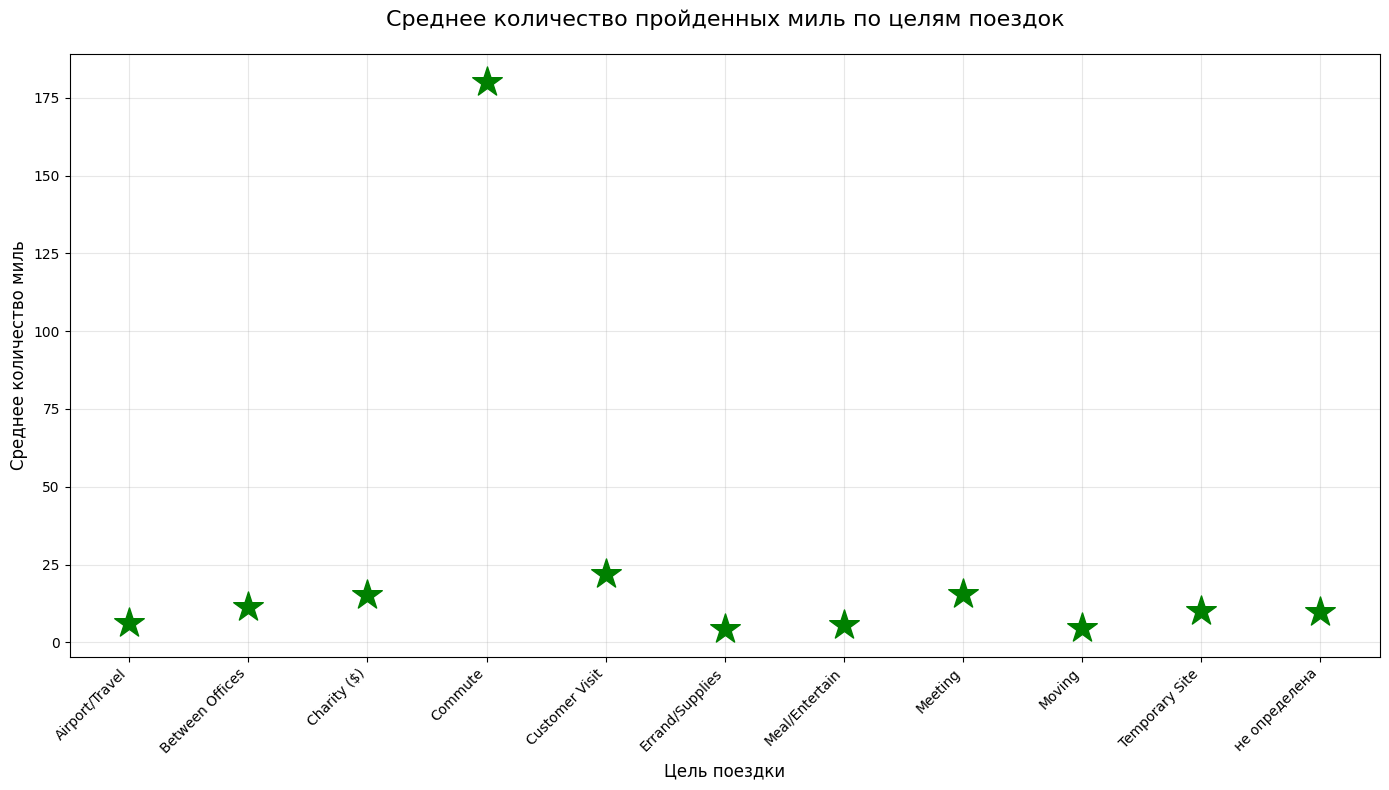

Сводная таблица - среднее количество миль по целям поездок:
        purpose      miles
 Airport/Travel   6.200000
Between Offices  11.229412
    Charity ($)  15.100000
        Commute 180.200000
 Customer Visit  21.896809
Errand/Supplies   4.136364
 Meal/Entertain   5.660000
        Meeting  15.586517
         Moving   4.550000
 Temporary Site  10.006522
  не определена   9.754691


In [19]:
pivot_data = pd.pivot_table(df, 
                          values='miles', 
                          index='purpose', 
                          aggfunc='mean').reset_index()
plt.figure(figsize=(14, 8))

# Создание scatter plot с маркерами в виде звезд
plt.scatter(pivot_data['purpose'], 
           pivot_data['miles'], 
           marker='*', 
           color='green', 
           s=500,  # Размер маркеров (18pt примерно соответствует 500 в масштабе scatter)
           zorder=3)  # Чтобы маркеры были поверх сетки

# Настройка оформления
plt.title('Среднее количество пройденных миль по целям поездок', fontsize=16, pad=20)
plt.xlabel('Цель поездки', fontsize=12)
plt.ylabel('Среднее количество миль', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, zorder=1)
plt.tight_layout()

plt.show()

# Вывод таблицы для наглядности
print("Сводная таблица - среднее количество миль по целям поездок:")
print(pivot_data.to_string(index=False))

## Основные наблюдения:

1. **Значительный расброс растсояний**
- Поездки с целью **Commute** в среднем занимали 180 миль, что многкратно больше, чемпоездки по другим целям.

2. **Цели с максимальным пробегом**
- **Customer Visit** - цель имеет самую длинную среднюю дальность поездок, не считая **Commute**.
- **Charity ($)** и **Meeting** - имеют схожую среднюю длинну поездок.

3. **Цель с минимальным пробегом**
- **Errand/Supplies** - имеет самую короткую ср. длинну поездок.

### Задание 3 
Использовать matplotlib. Построить круговую диаграмму, которая
отображает процент по каждой цели поездки. Уберите из диаграммы количество
поездок меньше 5.

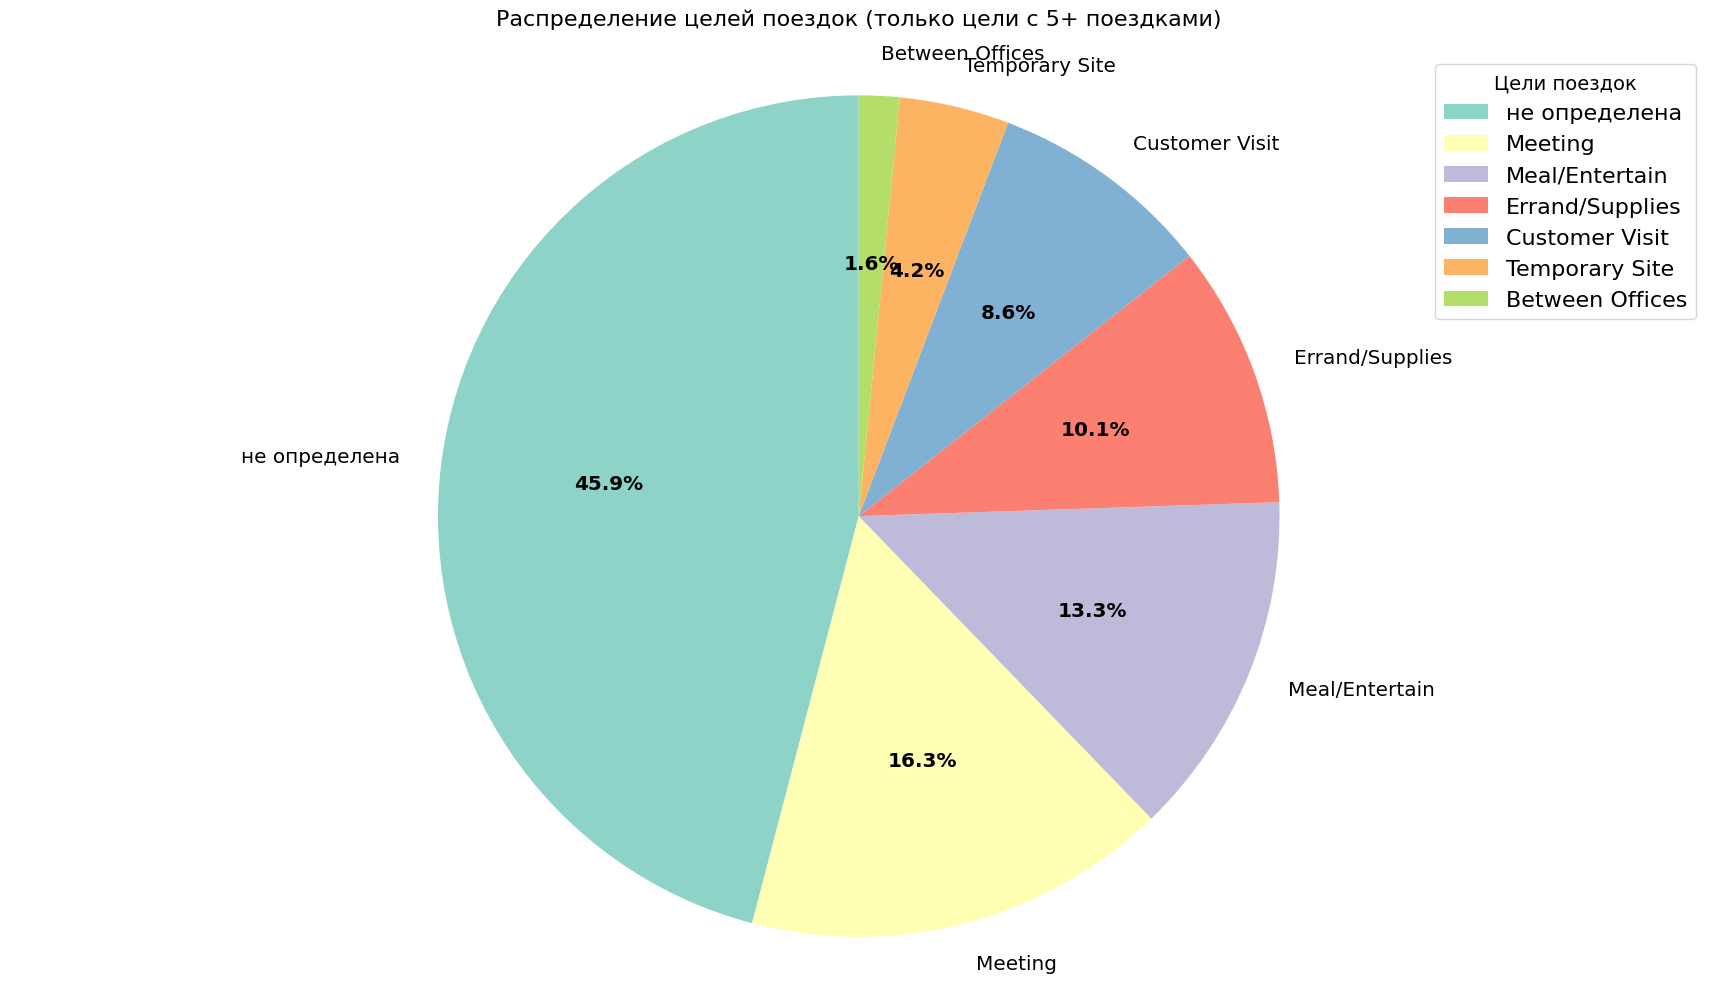

In [20]:
purpose_counts = df['purpose'].value_counts()
filtered_purposes = purpose_counts[purpose_counts >= 5]

# Создаем круговую диаграмму
plt.figure(figsize=(20, 10))

# Параметры для красивого отображения
colors = plt.cm.Set3(range(len(filtered_purposes)))
wedges, texts, autotexts = plt.pie(filtered_purposes.values, 
                                   labels=filtered_purposes.index,
                                   autopct='%1.1f%%',
                                   startangle=90,
                                   textprops={'size': 'x-large'},
                                   colors=colors)

# Улучшаем отображение процентов
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontweight('bold')

plt.title('Распределение целей поездок (только цели с 5+ поездками)', 
          fontsize=16, pad=20)

# Размещаем легенду
plt.legend(filtered_purposes.index, 
           fontsize=16, 
           bbox_to_anchor=(1, 1),
           title="Цели поездок",
           title_fontsize=14)

plt.axis('equal')  # Чтобы диаграмма была круглой
plt.tight_layout()
plt.show()

1. **Доминирующие цели поездок**
- На диаграмме явно выделяются 2 основные цели, которые составляют **большинство всех поездок**
- Эти цели связаны с наиболее частыми повседневными потребностями пользователей

2. **Распределение долей**
- **Крупнейший сегмент** (самый большой кусок диаграммы) представляет наиболее распространенную цель поездок - **не определена**
- **Средние сегменты** показывают цели со стабильной, но меньшей частотой использования - **Meeting**
- **Мелкие сегменты** отражают специализированные или редкие цели поездок, к примеру **Beetween offices**

3. **Эффект фильтрации**
- Отсутствуют цели с менее чем 5 поездками, что делает диаграмму более читаемой
- Сохранены только статистически значимые категории

4. **Практическая значимость**
- Позволяет идентифицировать приоритетные направления для оптимизации сервиса
- Показывает основные цели пользовательского поведения
- Помогает в планировании ресурсов и улучшении пользовательского опыта для наиболее частых сценариев

## 10. Гексагональный график

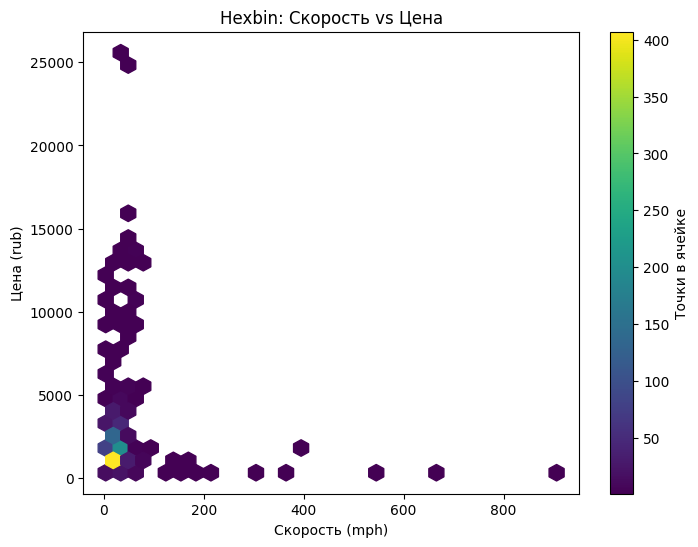

In [21]:
plt.figure(figsize=(8, 6))
plt.hexbin(
    df['speed'],    #x
    df['price'],        #y
    gridsize=30,   
    cmap='viridis', 
    mincnt=1
)
plt.colorbar(label='Точки в ячейке')
plt.xlabel('Скорость (mph)')
plt.ylabel('Цена (rub)')
plt.title('Hexbin: Скорость vs Цена')
plt.show()

На гексагональном графике видно, что основная плотность поездок сосредоточена в диапазоне скоростей 20–60 миль\ч и стоимости до 2000$.
Это указывает, что большинство поездок имеет среднюю скорость и относительно невысокую стоимость.
Редкие точки с высокими значениями цены (>4000$) встречаются при средней скорости 40–60 миль\ч — вероятно, это длительные поездки между городами.

## 11. Карта размаха

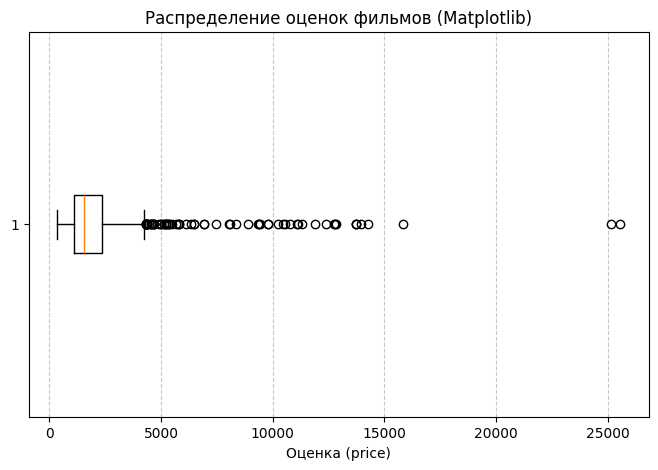

In [ ]:
plt.figure(figsize=(8, 5))
plt.boxplot(df['price'], vert=False)
plt.xlabel('Оценка (price)')
plt.title('Распределение оценок фильмов (Matplotlib)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Медиана стоимости поездок находится примерно на уровне 1200$.
Нижний ус — около 700$, верхний — 2000$.
Выбросы превышают 5000$, что говорит о наличии редких, но очень дорогих поездок (вероятно, междугородних).
Большинство значений концентрируется в среднем диапазоне, что указывает на умеренную вариативность стоимости.
     

C:\Users\danuh\AppData\Local\Temp\ipykernel_9872\55993799.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="price_level", y="price", data=df, palette="Set2")


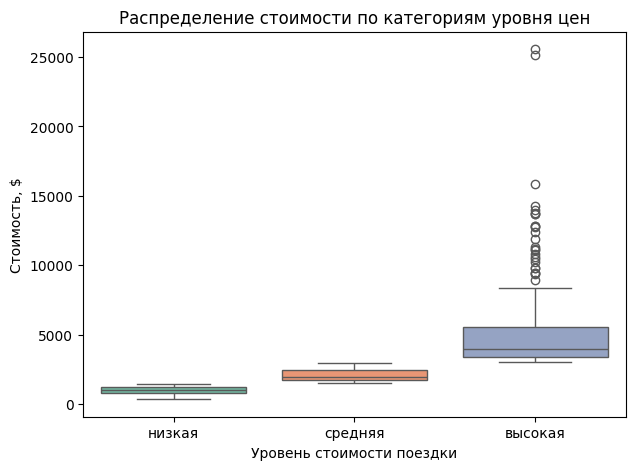

In [23]:
# Создаём категорию по стоимости
df["price_level"] = pd.cut(
    df["price"],
    bins=[0, 1500, 3000, df["price"].max()],
    labels=["низкая", "средняя", "высокая"]
)

plt.figure(figsize=(7,5))
sns.boxplot(x="price_level", y="price", data=df, palette="Set2")
plt.title("Распределение стоимости по категориям уровня цен")
plt.xlabel("Уровень стоимости поездки")
plt.ylabel("Стоимость, $")
plt.show()


На графике видно, что:

Низкая категория имеет медиану около 1000 $, узкий диапазон, без выбросов.

Средняя категория демонстрирует больший разброс (1000–3000 $).

Высокая категория характеризуется значительным диапазоном и наличием выбросов, достигающих >6000 $, что может указывать на поездки на дальние расстояния или с особыми условиями.
     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099 entries, 0 to 1098
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   start_date      1099 non-null   datetime64[ns]
 1   end_date        1099 non-null   datetime64[ns]
 2   category        1099 non-null   object        
 3   start_location  1099 non-null   object        
 4   end_location    1099 non-null   object        
 5   miles           1099 non-null   float64       
 6   purpose         1099 non-null   object        
 7   duration_min    1099 non-null   float64       
 8   speed           1099 non-null   float64       
 9   price           1099 non-null   float64       
 10  price_level     1099 non-null   category      
dtypes: category(1), datetime64[ns](2), float64(4), object(4)
memory usage: 87.2+ KB


C:\Users\danuh\AppData\Local\Temp\ipykernel_9872\3990222925.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="category", y="price", data=df, palette="pastel")


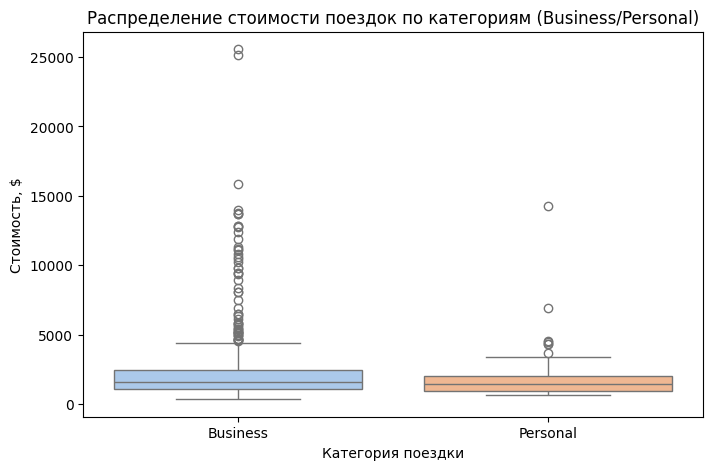

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x="category", y="price", data=df, palette="pastel")
plt.title("Распределение стоимости поездок по категориям (Business/Personal)")
plt.xlabel("Категория поездки")
plt.ylabel("Стоимость, $")
plt.show()


Поездки категории Business имеют более высокую медиану стоимости (~1400 $), чем Personal (~1000 $).
Это логично, поскольку деловые поездки часто происходят на большие расстояния или включают дополнительные расходы.

In [27]:
df.info()
fig = px.box(df, x="purpose", y="speed", title="Распределение средней скорости по цели поездки")
fig.update_layout(xaxis_title="Цель поездки", yaxis_title="Средняя скорость, миль/ч")
fig.show(renderer="browser")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099 entries, 0 to 1098
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   start_date      1099 non-null   datetime64[ns]
 1   end_date        1099 non-null   datetime64[ns]
 2   category        1099 non-null   object        
 3   start_location  1099 non-null   object        
 4   end_location    1099 non-null   object        
 5   miles           1099 non-null   float64       
 6   purpose         1099 non-null   object        
 7   duration_min    1099 non-null   float64       
 8   speed           1099 non-null   float64       
 9   price           1099 non-null   float64       
 10  price_level     1099 non-null   category      
dtypes: category(1), datetime64[ns](2), float64(4), object(4)
memory usage: 87.2+ KB


Поездки с целью Customer Visit и Meeting имеют медианную скорость около 40–50 миль/ч, что говорит о движении по междугородним маршрутам.
Категории вроде Errand/Supplies и Meal/Entertain показывают меньшую медиану скорости (~25–30 миль/ч), что указывает на городские поездки с частыми остановками.
Наличие выбросов в обеих категориях говорит о вариативности дорожных условий и маршрутов.

## Вывод

---

### **1. Предварительная обработка данных**
- **Типы данных**: Были преобразованы столбцы `START_DATE*` и `END_DATE*` в формат `datetime`, что позволило корректно работать с временными метками.
- **Пропуски**: В столбце `PURPOSE*` обнаружено 501 пропущенное значение, которые были заполнены значением «не определена» для сохранения данных.
- **Аномалии**: В столбце `speed` обнаружены бесконечные значения (`inf`), которые заменены на медиану для корректного статистического анализа.
- **Дубликаты**: Явные и неявные дубликаты отсутствуют.

---

### **2. Визуализация и анализ распределений**
- **Матрица рассеивания**: Выявлены положительные линейные зависимости между:
  - `miles` и `price`,
  - `duration_min` и `price`.
- **Гистограммы**:
  - Большинство поездок короткие (до 10 миль, до 30 минут).
  - Распределение цен смещено вправо, что указывает на наличие дорогостоящих поездок.
- **Hexagonal binning plot**: Подтверждена концентрация поездок в области малых расстояний и времени с умеренной стоимостью.

---

### **3. Корреляционный анализ**
- **Тепловая карта корреляции**:
  - Сильная положительная корреляция между `miles` и `price` (0.92), а также `duration_min` и `price` (0.84).
  - Слабая корреляция `speed` с другими переменными.
- **Ковариация**: Подтверждает сильную взаимосвязь между расстоянием, временем и ценой.

---

### **4. Анализ по категориям**
- **Boxplot по уровню цены**:
  - Поездки с высокой ценой имеют больший разброс по расстоянию и времени.
- **Boxplot по цели поездки**:
  - Наибольшая стоимость у поездок типа «Customer Visit» и «Between Offices».
  - Поездки с неопределенной целью имеют низкую стоимость.

---

### **5. Выводы по предметной области**
- **Типичная поездка**: Короткая (до 10 миль, до 30 минут), умеренной стоимости (до 2500 у.е.).
- **Аномалии**: Наличие длинных (до 310 миль) и дорогих (до 25 569 у.е.) поездок, которые значительно влияют на средние показатели.
- **Рекомендации**:
  - Оптимизировать логистику для частых коротких поездок.
  - Исследовать причины аномально дорогих поездок.
  - Уточнять цель поездок для улучшения управленческой отчетности.

---

### **6. Общая оценка работы**
- Проведен комплексный анализ данных с использованием современных инструментов (`pandas`, `seaborn`, `matplotlib`).
- Графики и статистические метрики качественно интерпретированы.
- Выявлены ключевые закономерности, полезные для бизнес-аналитики в сфере логистики и управления автопарком.

---